In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preprocessing.preprocess_ucr import UCRDatasetImporter
from preprocessing.preprocess_ucr import UCRDataset
from preprocessing.preprocess_ucr import AugUCRDataset
from preprocessing.data_pipeline import build_data_pipeline
from utils import (
    load_yaml_param_settings,
    get_root_dir,
    model_filename,
)
from examine_data import Examiner
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# ['SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'Symbols','Mallat']
UCR_SUBSET = [
    "ElectricDevices",
    "StarLightCurves",
    "Wafer",
    "ECG5000",
    "TwoPatterns",
    "FordA",
    "UWaveGestureLibraryAll",
    "FordB",
    "ShapesAll",
    'SonyAIBORobotSurface1', 
    'SonyAIBORobotSurface2', 
    'Symbols',
    'Mallat'
]

dataset_name = "ShapesAll"
examiner_vq = Examiner(datasets=[dataset_name])
examiner_bt = Examiner(datasets=[dataset_name])
examiner_vib = Examiner(datasets=[dataset_name])


self.X_train.shape: (600, 512)
self.X_test.shape: (600, 512)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
self.X_train.shape: (600, 512)
self.X_test.shape: (600, 512)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
self.X_train.shape: (600, 512)
self.X_test.s

In [36]:
examiner_vq.load_models(dataset=dataset_name)
examiner_bt.load_models(dataset=dataset_name, ssl_method="barlowtwins")
examiner_vib.load_models(dataset=dataset_name, ssl_method="vibcreg")

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
encoder-seed-1-Y3A7B9-ShapesAll.ckpt
 encoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
decoder-seed-1-Y3A7B9-ShapesAll.ckpt
 decoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
vqmodel-seed-1-Y3A7B9-ShapesAll.ckpt
 vqmodel loaded
maskgit-seed-1-Y3A7B9-ShapesAll.ckpt
maskgit loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
barlowtwins-encoder-seed-1-DQZWZT-ShapesAll.ckpt
barlowtwins encoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
barlowtwins-decoder-seed-1-DQZWZT-ShapesAll.ckpt
barlowtwins decoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
barlowtwins-vqmodel-seed-1-DQZWZT-ShapesAll.ckpt


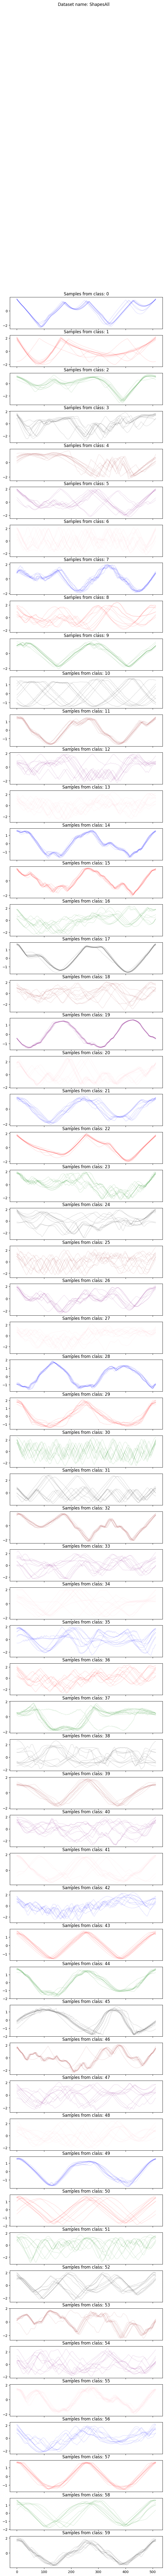

In [43]:
examiner_vq.plot_datasets()

In [46]:
X_train = examiner_vq.loader_dict[dataset_name][0].dataset.X

In [38]:
Y_train = examiner_vq.loader_dict[dataset_name][0].dataset.Y
labels = np.unique(Y_train)
n_samples = 50
labels

x_new_vib = examiner_vib.generate_samples(n_samples)
x_new_bt =  examiner_bt.generate_samples(n_samples)
x_new_vq =  examiner_vq.generate_samples(n_samples)

x_new_vib_cond = []
x_new_bt_cond = []
x_new_vq_cond = []

for i in labels:
    x_new_vib_cond.append(examiner_vib.generate_samples(n_samples, i))
    x_new_bt_cond.append(examiner_bt.generate_samples(n_samples, i))
    x_new_vq_cond.append(examiner_vq.generate_samples(n_samples, i))

100%|██████████| 1/1 [00:03<00:00,  3.82s/it]


In [39]:

def plot_new(ax, x_new, color = "red", alpha = 0.1):
    # nr_of_samples = x_new.shape[0]
    for x in x_new:
        ax.plot(x, color = color, alpha = alpha) 
    return ax

IndexError: index 3 is out of bounds for axis 0 with size 3

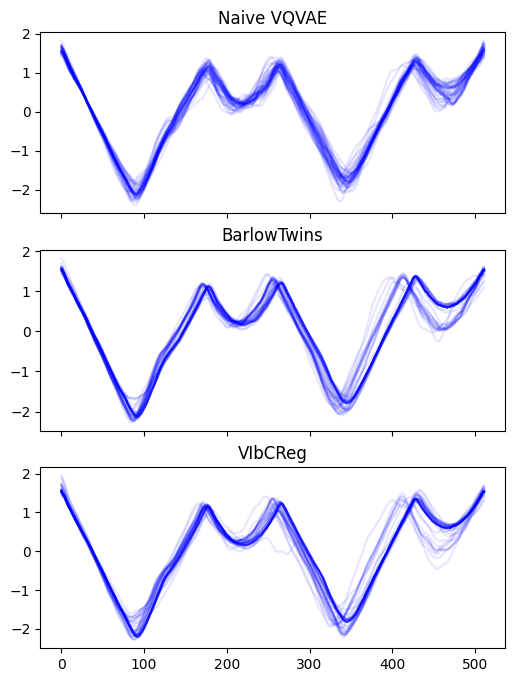

In [47]:
colors = ['blue','red', 'green', 'black', 'brown', 'purple','pink'] #, 'brown', 'pink'


for i in labels:
    f, a = plt.subplots(4, 1, figsize=(6, 8), sharex='col', sharey='row')
    a[0].set_title("Naive VQVAE")
    a[0] = plot_new(a[0], x_new_vq_cond[i], color= colors[i%len(colors)])

    a[1].set_title("BarlowTwins")
    a[1] = plot_new(a[1], x_new_bt_cond[i], color= colors[i%len(colors)])

    a[2].set_title("VIbCReg")
    a[2] = plot_new(a[2], x_new_vib_cond[i], color= colors[i%len(colors)])
    
    mask = np.squeeze(Y_train == i)
    x_conditional = X_train[mask, :]
    a[3].set_title("Ground truth (training data)")
    a[3] = plot_new(a[2], x_new_vib, color= colors[i%len(colors)])

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    f.suptitle(f"Conditional sample from class: {i}", fontsize=16, x=0.45)
    plt.show()


f, a = plt.subplots(3, 1, figsize=(8, 6), sharex='col', sharey='row')
a[0].set_title("Naive VQVAE")
a[0] = plot_new(a[0], x_new_vq, color= "black")

a[1].set_title("BarlowTwins")
a[1] = plot_new(a[1], x_new_bt, color= "black")

a[2].set_title("VIbCReg")
a[2] = plot_new(a[2], x_new_vib, color= "black")




plt.tight_layout(rect=[0, 0, 1, 0.96]) 
f.suptitle("Unconditional sampling", fontsize=16, x=0.45)
plt.show()